In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")


# import data
train_set= pd.read_csv('./Data/train.csv', index_col= 'id')
test_set= pd.read_csv('./Data/test.csv', index_col= 'id')


In [27]:
# store all duplicated columns
duplicated_cols_dict= {}
duplicated_cols_list_full = []


# THIS FUNCTION is to drop all duplicates columns
for i, col in enumerate(train_set.columns):
    duplicated_cols_list= []
    # if the col is already one of the keys
    # then skip
    if col in duplicated_cols_list_full:
        continue
    for c in train_set.columns:
        if (train_set[col].equals(train_set[c])):
            duplicated_cols_list.append(c)
            duplicated_cols_list_full.append(c)
        
           
    if (len(duplicated_cols_list) > 1):
        duplicated_cols_dict[col] = duplicated_cols_list   

In [28]:
from matplotlib.cbook import flatten

# determine duplicated columns to drop
drop_cols = set(list(flatten(list(duplicated_cols_dict.values())))) - set(duplicated_cols_dict.keys())

In [31]:
# drop the duplicates

train_set= train_set.drop(drop_cols, axis= 1)
test_set= test_set.drop(drop_cols, axis= 1)

In [35]:
cols_Vincent = train_set.columns[:int(len(train_set.columns)/2)]
cols_Duong = train_set.columns[int(len(train_set.columns)/2):]

Text(0.5, 1.0, 'Percentages of missing values in each column')

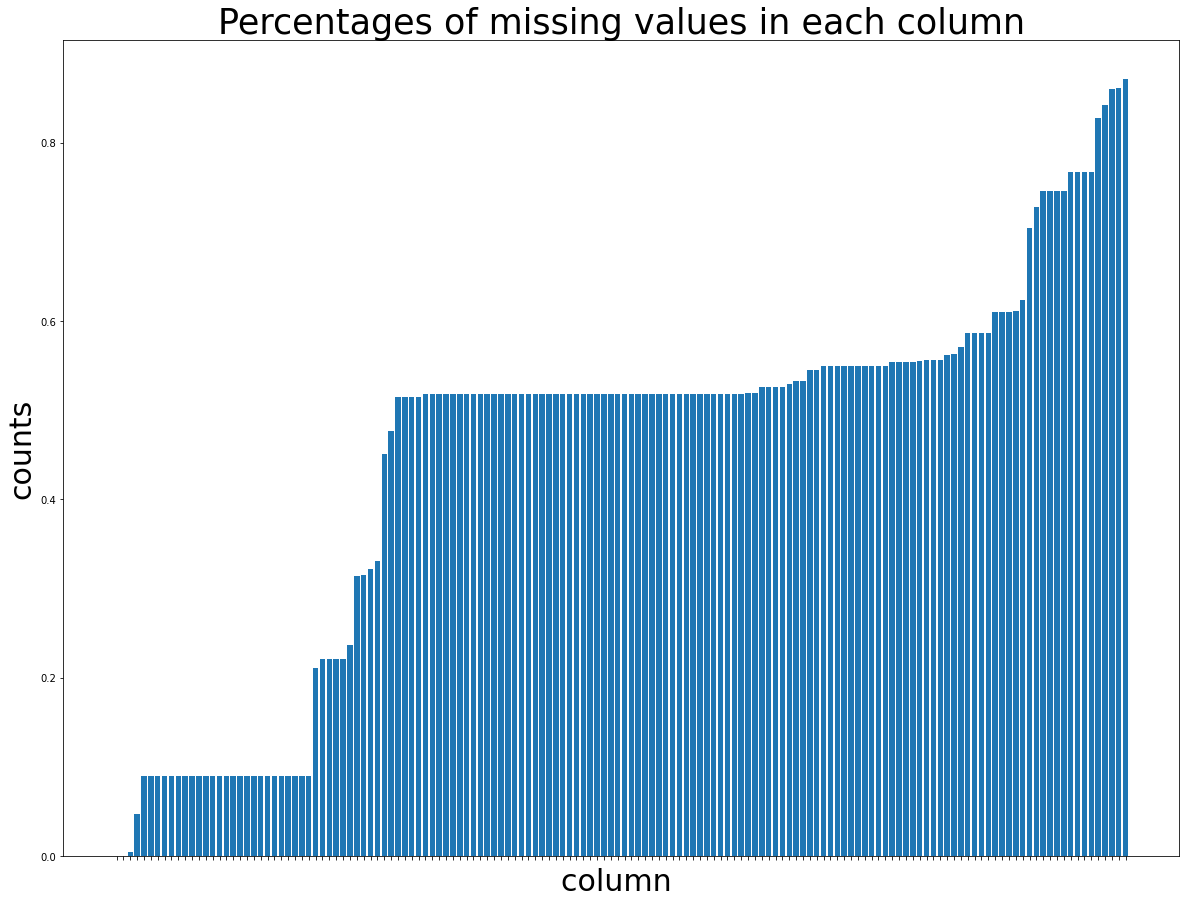

In [36]:
na_counts= train_set.isna().sum().sort_values()
fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(train_set)

ax.bar(na_counts.index,na_counts.values/total_samples)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("counts", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Percentages of missing values in each column", fontsize= 35)

In [37]:
train_set.describe()

,label,Field_3,Field_10,Field_13,Field_19,Field_20,Field_21,Field_22,Field_23,Field_27,...,partner4_L,partner5_A,partner5_D,partner5_G,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82
count,53030.000000,25564.000000,25564.000000,25564.0,25564.000000,2.556400e+04,25564.000000,25564.000000,25564.000000,2.556400e+04,...,48283.000000,48283.000000,48283.000000,48283.000000,50518.000000,36397.00000,27782.000000,36320.000000,35981.000000,53030.000000
mean,0.316726,1.538687,1.096542,1.0,0.267022,3.603181e+06,4.485331,0.999452,31.472540,2.252840e+05,...,0.306464,0.254334,0.000124,0.000041,1.087236,20.80144,30.911307,-1.793163,-32.149412,1.668659
std,0.465204,0.498511,0.332593,0.0,0.835968,2.282034e+06,0.281697,0.053069,46.238001,8.423081e+05,...,0.461030,0.435491,0.011147,0.006436,0.297815,40.10993,35.968215,32.176041,63.442452,1.090910
min,0.000000,1.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,-267.00000,0.000000,-267.000000,-290.000000,1.000000
25%,0.000000,1.000000,1.000000,1.0,0.000000,1.490000e+06,4.500000,1.000000,1.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,4.00000,5.326888,-5.600000,-69.000000,1.000000
50%,0.000000,2.000000,1.000000,1.0,0.000000,3.801000e+06,4.500000,1.000000,14.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,16.00000,15.556349,2.086957,0.000000,1.000000
75%,1.000000,2.000000,1.000000,1.0,0.000000,4.500000e+06,4.500000,1.000000,40.000000,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,1.000000,36.00000,46.013087,9.500000,1.000000,2.000000
max,1.000000,2.000000,5.000000,1.0,6.864000,2.980000e+07,6.000000,2.000000,464.000000,2.000000e+07,...,1.000000,1.000000,1.000000,1.000000,5.000000,242.00000,325.976226,238.000000,238.000000,4.000000


In [38]:
print ("Labels count")
train_set.label.value_counts()

Labels count


0    36234
1    16796
Name: label, dtype: int64

Text(0.5, 1.0, 'Correlation with labels')

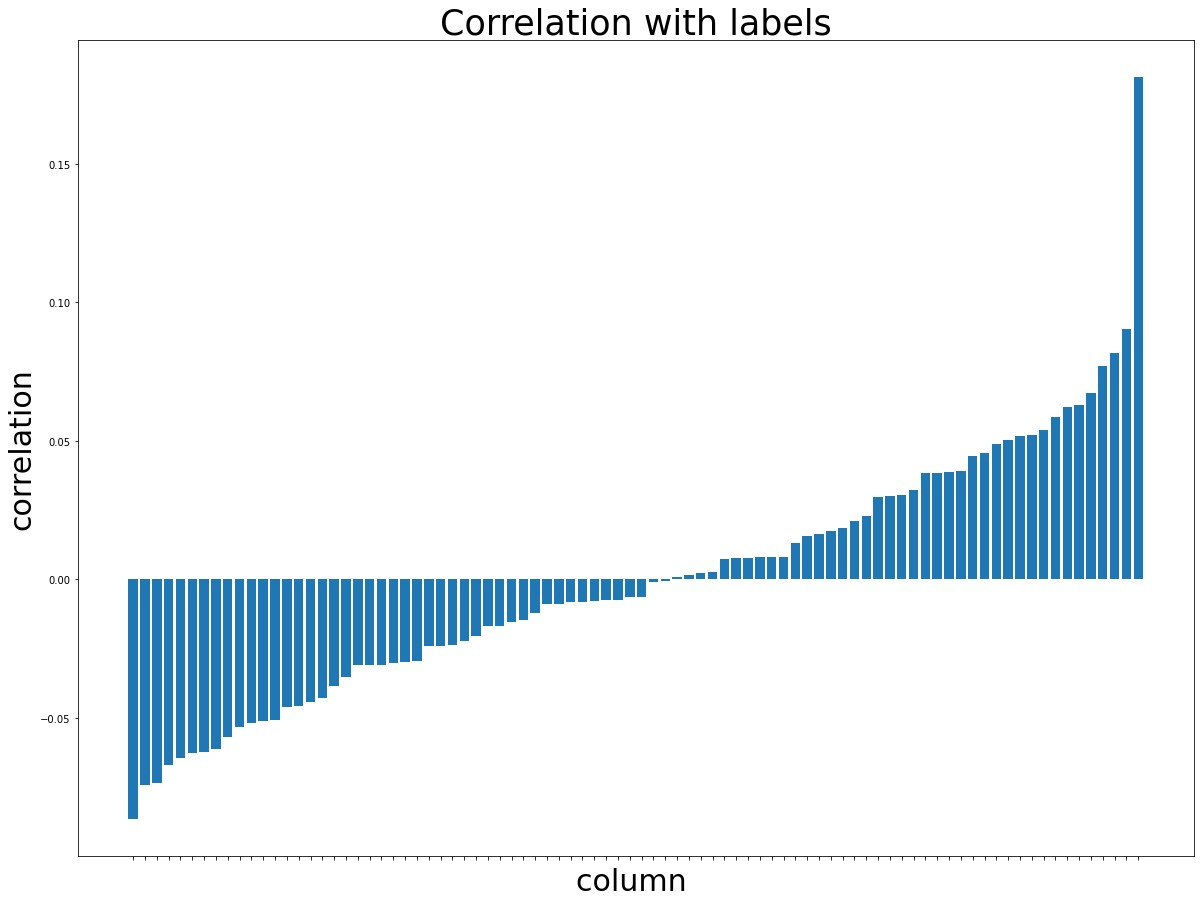

In [39]:
corrs = train_set.corr()['label'].sort_values()
# exclude nan corrs
corrs = corrs[corrs.values < 1]

fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(train_set)

ax.bar(corrs.index,corrs.values)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("correlation", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Correlation with labels", fontsize= 35)

## Duong's part

In [40]:
data_Duong = train_set[cols_Duong].copy()

data_Duong['label']= train_set['label'].values

In [41]:
data_Duong.head()

,info_social_sex,subscriberCount,currentLocationLocationId,currentLocationLatitude,currentLocationLongitude,homeTownLocationId,homeTownLatitude,homeTownLongitude,data.basic_info.locale,currentLocationCity,...,partner5_D,partner5_G,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82,label
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,cb1,1.0,NaN,NaN,NaN,NaN,1,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,4,1.0,NaN,NaN,NaN,NaN,1,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1,1.0,33.0,10.769445,6.466667,0.0,2,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3,1


Text(0.5, 1.0, 'Percentages of missing values in each column')

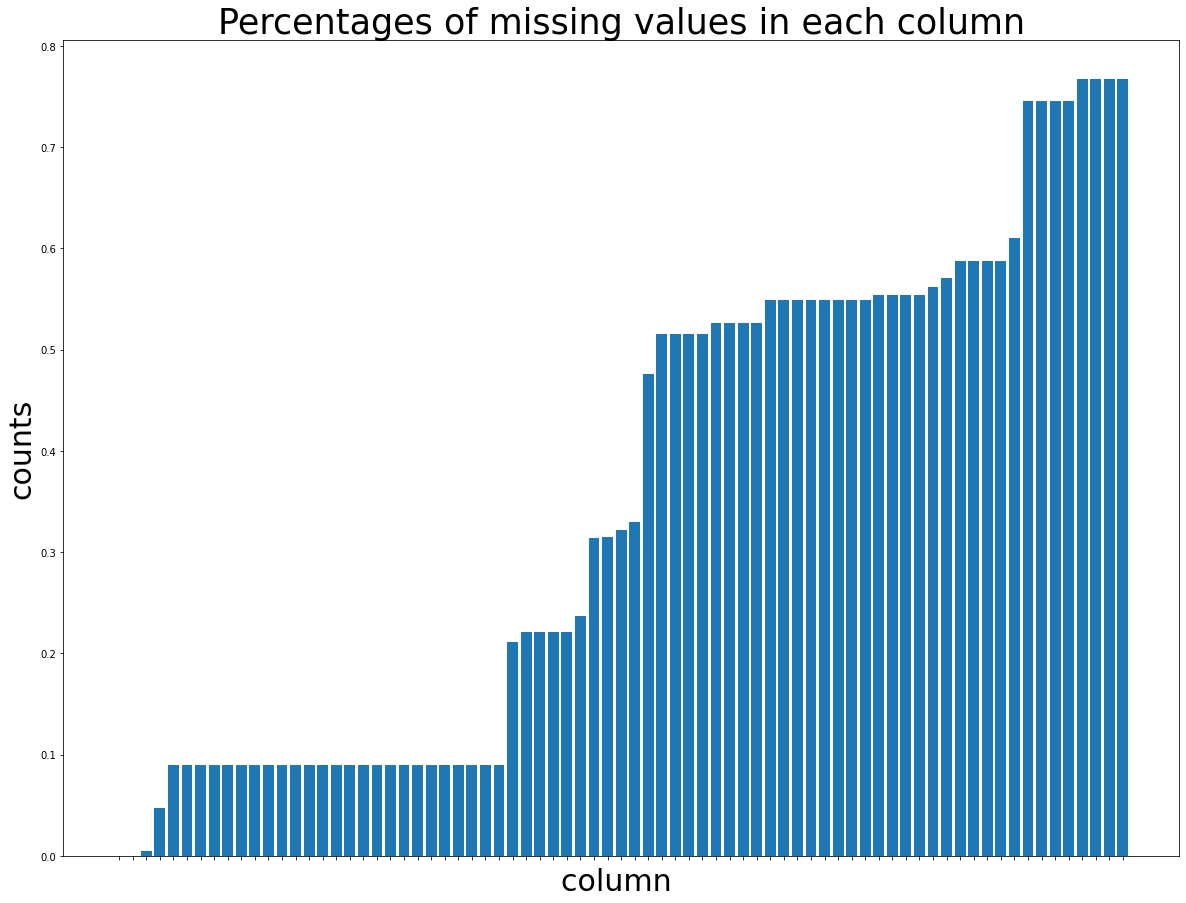

In [42]:
na_counts= data_Duong.isna().sum().sort_values()
fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(na_counts.index,na_counts.values/total_samples)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("counts", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Percentages of missing values in each column", fontsize= 35)

Text(0.5, 1.0, 'Correlation with labels')

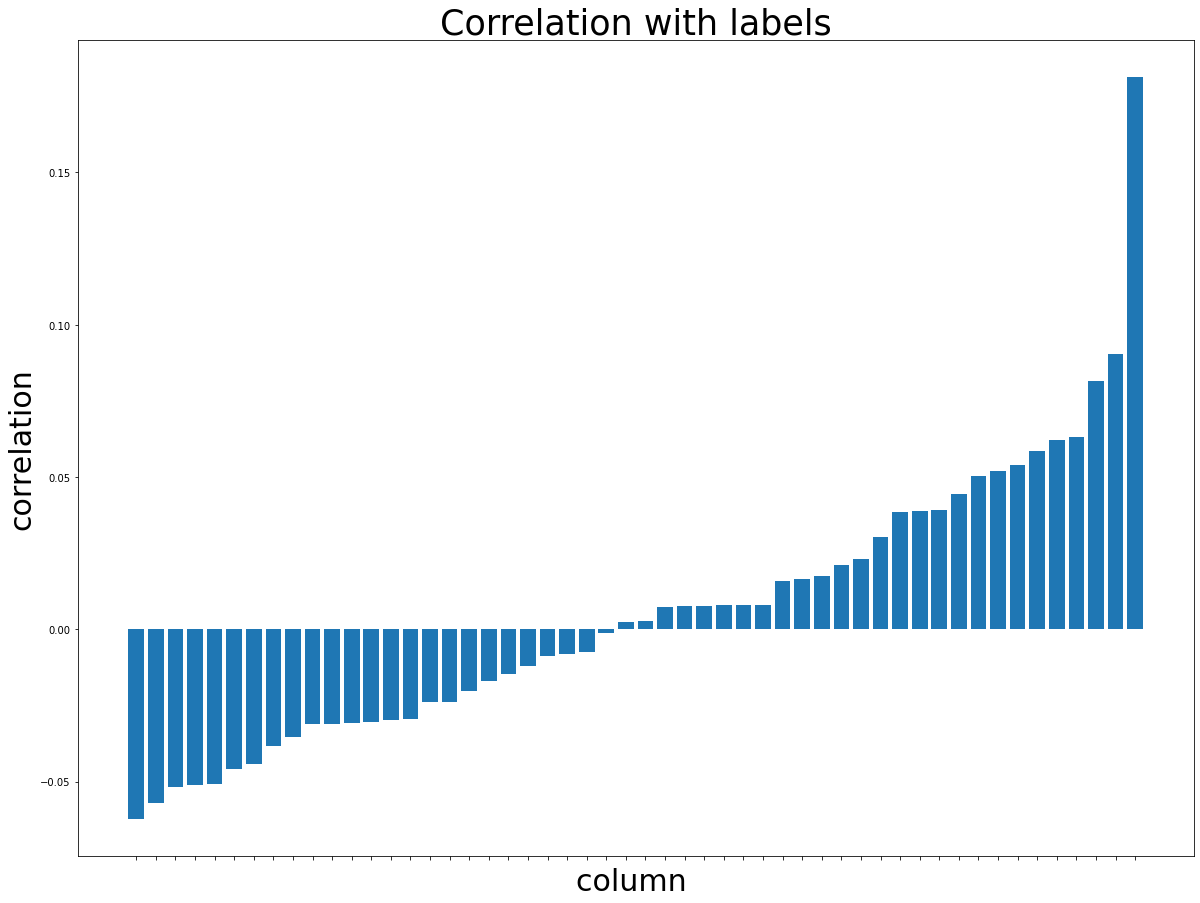

In [43]:
corrs = data_Duong.corr()['label'].sort_values()
# exclude nan corrs
corrs = corrs[corrs.values < 1]

fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(corrs.index, corrs.values)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("correlation", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Correlation with labels", fontsize= 35)

### Drop columns about geological info

In [46]:
useless_cols = ['currentLocationLocationId', 'currentLocationLatitude', 
                'currentLocationLongitude', 'homeTownLocationId', 
                'homeTownLatitude', 'homeTownLongitude',
                'data.basic_info.locale', 'currentLocationCity',
                'currentLocationCountry', 'currentLocationName', 
                'currentLocationState', 'homeTownCity', 
                'homeTownCountry', 'homeTownName', 'homeTownState']

data_Duong.drop(useless_cols, axis= 1, inplace= True)

### For info_social_sex column:

In [49]:
label_by_info_social_sex = data_Duong.groupby(['label'])\
                ['info_social_sex'].value_counts()
df = pd.DataFrame(label_by_info_social_sex).\
    rename({'info_social_sex':'counts'}, axis=1).reset_index()

### Female has a slightly higher chance of having label 0.
### For the existing values, there are more male than female customers.

Text(0.5, 1.0, 'pct of Info social sex by label')

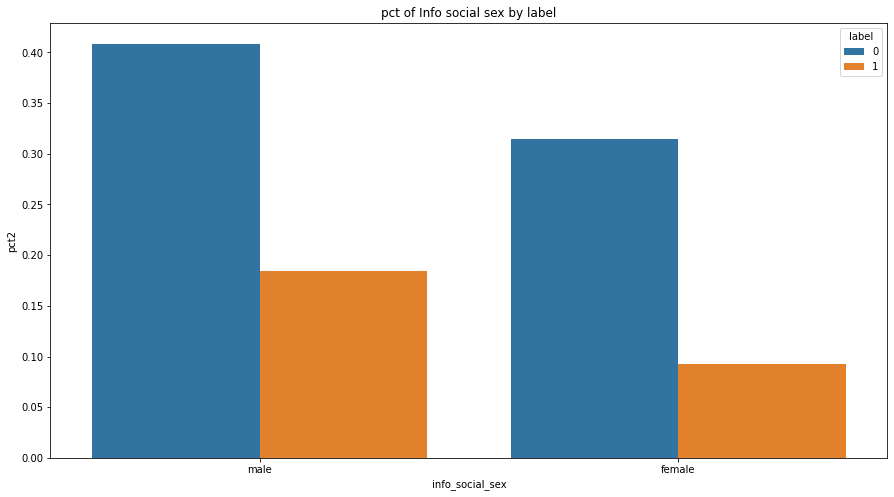

In [50]:
df['pct2'] = df['counts']/df['counts'].sum()

import seaborn as sns

fig, ax = plt.subplots(figsize= (15,8))
sns.barplot(x= 'info_social_sex', y = 'pct2', \
            hue= 'label', data= df, ax=ax)

ax.set_title("pct of Info social sex by label")

In [51]:
print ("percentages of male and female in column info_social_sex:")
info_social_sex_pct_original = data_Duong.info_social_sex.value_counts()/data_Duong.info_social_sex.value_counts().sum()
info_social_sex_pct_original

percentages of male and female in column info_social_sex:


male      0.592448
female    0.407552
Name: info_social_sex, dtype: float64

### We'll fill in missing values with 60% male and 40% female

In [52]:
random.seed(1976)

info_social_sex_random = random.choice(info_social_sex_pct_original.index,\
                                       size= len(data_Duong),\
                                       p= info_social_sex_pct_original.values)
#data_Duong = train_set[cols_Duong].copy()
data_Duong['info_social_sex'] = np.where(data_Duong['info_social_sex'].isnull(),\
            info_social_sex_random,\
            data_Duong['info_social_sex'])

In [53]:
print ("After filling all NAs...")
data_Duong['info_social_sex'].value_counts()/data_Duong['info_social_sex'].value_counts().sum()

After filling all NAs...


male      0.592137
female    0.407863
Name: info_social_sex, dtype: float64

## subscriberCount column
### Plot its distributions

### A lot of missing values

In [54]:
data_Duong.subscriberCount.value_counts(dropna= False)

NaN       29130
0.0       18335
13.0         35
47.0         30
30.0         29
          ...  
1817.0        1
1056.0        1
620.0         1
1220.0        1
796.0         1
Name: subscriberCount, Length: 1526, dtype: int64

## If subscriberCount > 60,000 then label = 0
## We can use it as a factor to automatically fill in label later


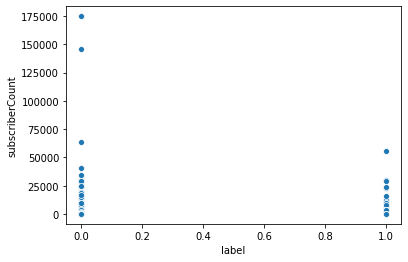

In [55]:
sns.scatterplot(data_Duong.label, data_Duong.subscriberCount)

### it seems like the more subsciber counts, the more likely its label will be 0

Text(0.5, 0.98, 'box plots of labels based on subscriberCount')

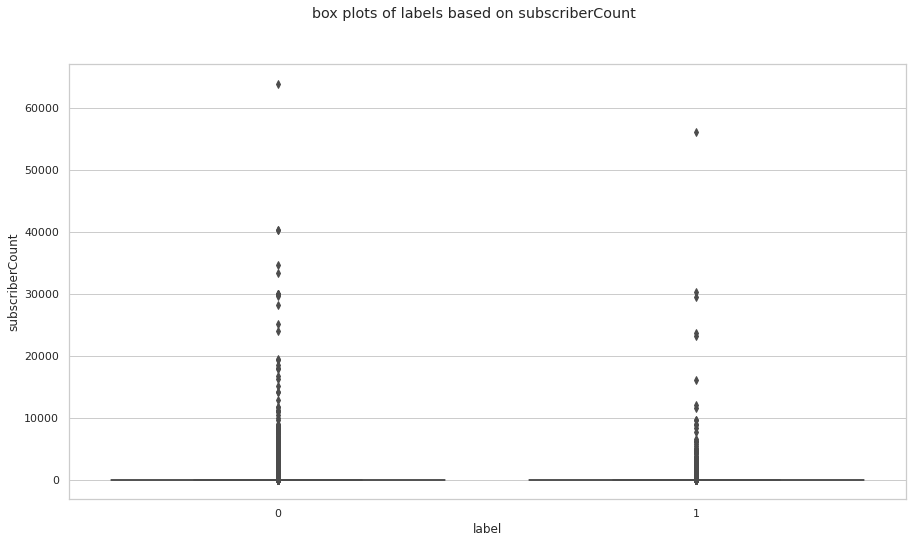

In [56]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15,8)

sns.boxplot(x= 'label', y= 'subscriberCount', data= data_Duong[data_Duong.subscriberCount <100000])
plt.suptitle("box plots of labels based on subscriberCount")

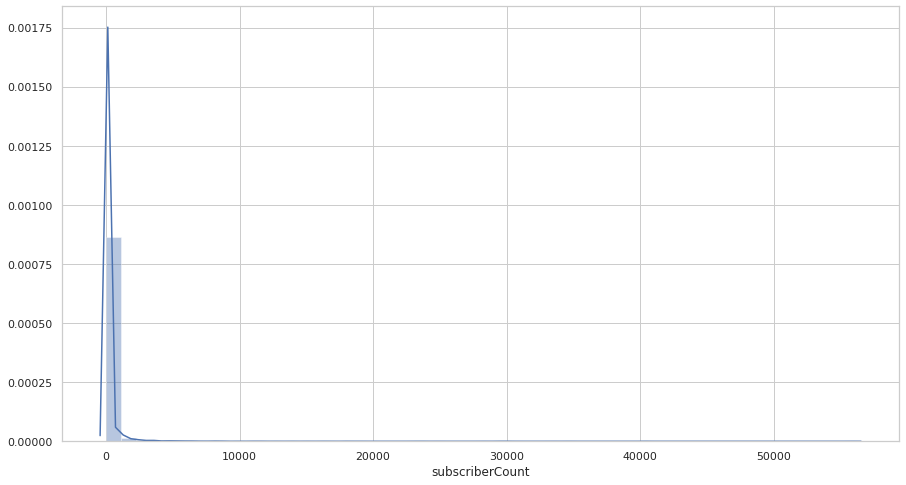

In [57]:
sns.distplot(data_Duong[data_Duong.subscriberCount < 60000].subscriberCount)

In [58]:
print ("General stats data_Duong.subscriberCount")
print ("median   ", data_Duong.subscriberCount.median())
print (data_Duong.subscriberCount.describe())

General stats data_Duong.subscriberCount
median    0.0
count     23900.000000
mean        189.071046
std        2203.631422
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      174916.000000
Name: subscriberCount, dtype: float64


## Fill in NAs of subscriberCount with mean and std


In [59]:
subscriberCount_random = data_Duong.subscriberCount.mean() + \
                    data_Duong.subscriberCount.std()*np.random.randn(len(data_Duong))
subscriberCount_random = np.where(subscriberCount_random <0, 0, subscriberCount_random)

In [60]:
data_Duong['subscriberCount'] = np.where(data_Duong['subscriberCount'].isnull(), \
                                         subscriberCount_random,
                                         data_Duong['subscriberCount'])

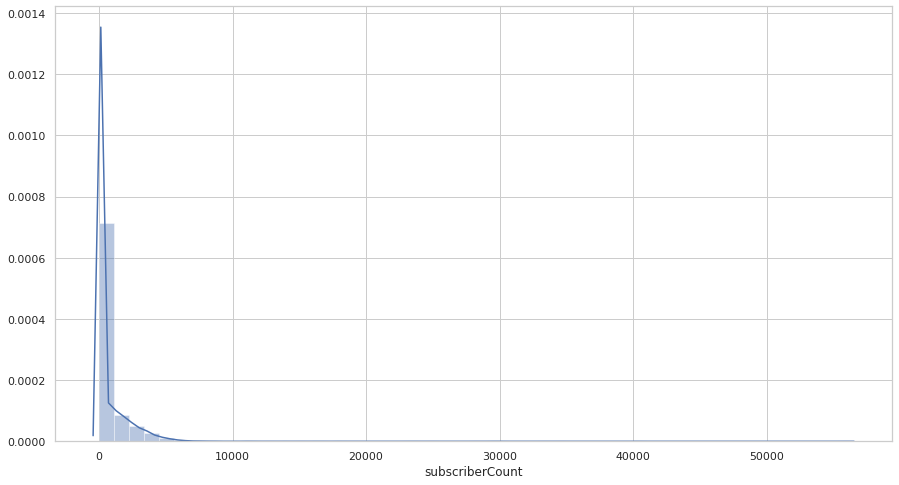

In [64]:
sns.distplot(data_Duong[data_Duong.subscriberCount < 60000].subscriberCount)

# COLUMN TOPFRIENDS

In [76]:
label_by_topFriends = data_Duong.groupby('label')['topFriends'].\
        value_counts().sort_index()
df_label_by_topFriends= pd.DataFrame(label_by_topFriends).\
        rename({'topFriends':'counts'}, axis=1).reset_index()

## most samples has topFriends= 5

Text(0.5, 1.0, 'pct of Info social sex by label')

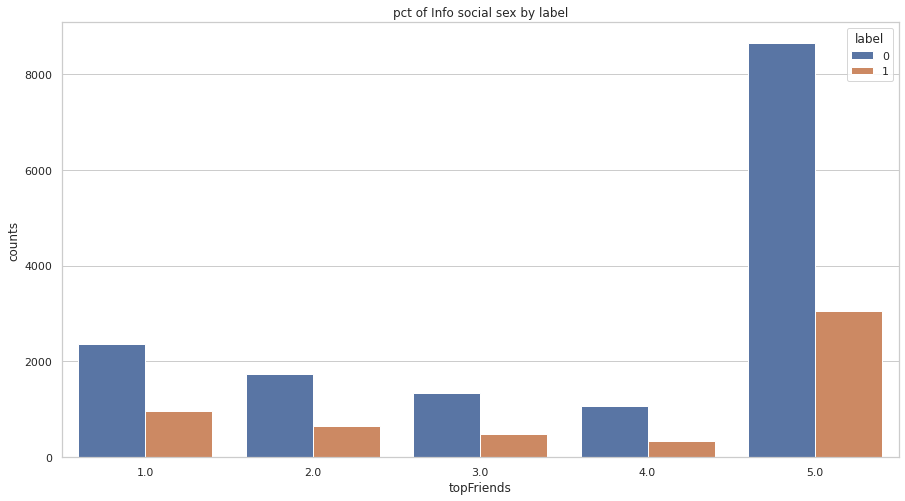

In [78]:


fig, ax = plt.subplots(figsize= (15,8))
sns.barplot(x= 'topFriends', y = 'counts', \
            hue= 'label', data= df_label_by_topFriends, ax=ax)


ax.set_title("Counts topFriends by label")

Text(0.5, 1.0, 'percentage of labels by group of topFriends by label')

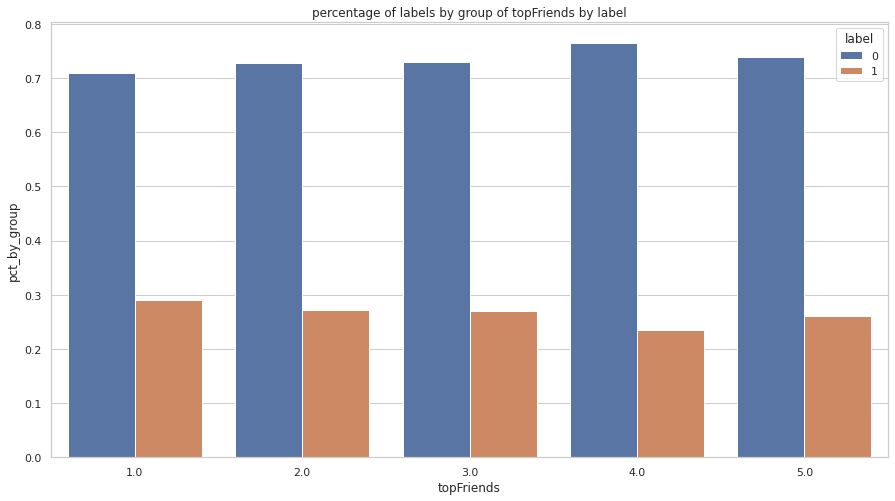

In [100]:
df_label_by_topFriends['pct_by_group'] = df_label_by_topFriends.counts/\
        np.array(list(df_label_by_topFriends.groupby('topFriends').sum()['counts'].values)*2)

fig, ax = plt.subplots(figsize= (15,8))
sns.barplot(x= 'topFriends', y = 'pct_by_group', \
            hue= 'label', data= df_label_by_topFriends, ax=ax)

ax.set_title("percentage of labels by group of topFriends by label")

## Looks like most group will have the same proportions of label 0 and 1.

## fill in missing data randomly based on proportions of topFriends "categories" (0-5)

In [114]:
topFriends_cat_pct = data_Duong.topFriends.value_counts().sort_index()/\
                data_Duong.topFriends.value_counts().sum()



In [116]:
random.seed(1976)

topFriends_random = random.choice(topFriends_cat_pct.index,\
                                       size= len(data_Duong),\
                                       p= topFriends_cat_pct.values)

data_Duong['topFriends'] = np.where(data_Duong['topFriends'].isnull(),\
            topFriends_random,\
            data_Duong['topFriends'])

# COLUMN 

(array([1.2137e+04, 1.5493e+04, 1.1532e+04, 5.8320e+03, 2.2290e+03,
        8.0200e+02, 2.0200e+02, 4.1000e+01, 8.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

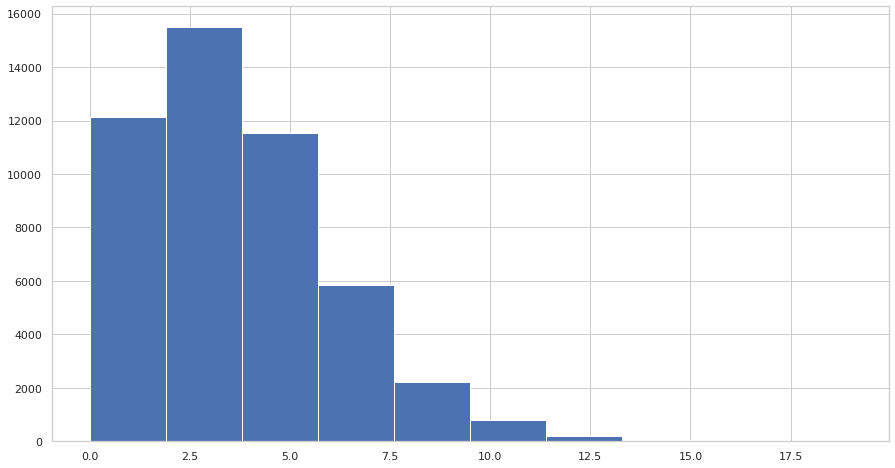

In [122]:
plt.hist(data_Duong.numOrg)

In [126]:
data_Duong.columns

Index(['info_social_sex', 'subscriberCount', 'topFriends', 'numOrg',
       'F_numOrg', 'F_numQuery', 'F_startDate', 'F_endDate', 'E_numOrg',
       'E_numQuery', 'E_startDate', 'E_endDate', 'C_numOrg', 'C_numQuery',
       'C_startDate', 'C_endDate', 'G_numOrg', 'G_numQuery', 'G_startDate',
       'G_endDate', 'A_numOrg', 'A_numQuery', 'A_startDate', 'A_endDate',
       'summary_6m', 'summary_3m', 'summary_1m', 'summary_1w', 'partner0_A',
       'partner0_B', 'partner0_C', 'partner0_D', 'partner0_E', 'partner0_F',
       'partner0_G', 'partner0_H', 'partner1_A', 'partner1_C', 'partner1_G',
       'partner1_H', 'partner2_A', 'partner2_C', 'partner2_D', 'partner2_F',
       'partner2_H', 'partner3_A', 'partner3_D', 'partner3_E', 'partner4_L',
       'partner5_A', 'partner5_D', 'partner5_G', 'brief', 'num_of_phone',
       'Field_78', 'Field_79', 'Field_80', 'Field_81', 'Field_82', 'label'],
      dtype='object')

# create custom columns

### column diff_start_end_date = diff between E_startDate and E_endDate

In [ ]:
from datetime import datetime

data_Duong['E_endDate'] = data_Duong['E_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['E_startDate'] = data_Duong['E_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))


data_Duong['F_endDate'] = data_Duong['F_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['F_startDate'] = data_Duong['F_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_startDate'] = data_Duong['G_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_endDate'] = data_Duong['G_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               


data_Duong['A_endDate'] = data_Duong['A_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['A_startDate'] = data_Duong['A_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               

## *letter*_diff_date = diff between *letter*_startDate and *letter*_endDate

In [ ]:
data_Duong[['E_endDate', 'F_endDate']]

In [ ]:
train_set.Field_1

In [ ]:
data_Duong['E_diff_date']= data_Duong['E_endDate'] - data_Duong['E_startDate']

data_Duong['F_diff_date']= data_Duong['F_endDate'] - data_Duong['F_startDate']

data_Duong['G_diff_date']= data_Duong['G_endDate'] - data_Duong['G_startDate']

data_Duong['A_diff_date']= data_Duong['A_endDate'] - data_Duong['A_startDate']

In [ ]:
E_diff_date_counts = data_Duong['E_diff_date'].value_counts()

In [ ]:
E_diff_date_counts

In [ ]:
plt.bar(E_diff_date_counts.index, E_diff_date_counts.values)

In [ ]:
for i, col in enumerate(data_Duong.columns):
    print (i+1, "/ Column name:", col)
    print(data_Duong[col].value_counts(dropna=False))

## Explore topfriends

In [ ]:
topFriends_counts

In [ ]:
train_set['E_endDate'].equals(train_set['G_endDate'])

In [ ]:
train_set[['Field_14','Field_16']].drop_duplicates()

In [ ]:
for i in range(10):
    if (i%3 == 0):
        continue
    print (i)